In [23]:
import numpy
import pandas as pd
import sklearn as scikit_learn

In [24]:
df_ludnosc = pd.read_csv("../data/ludnosc.csv", sep=";")
df_ludnosc.tail(10)

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
25864,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2011,"21,4",%,NaN,NaN
25865,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2012,"20,6",%,NaN,NaN
25866,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2013,"21,5",%,NaN,NaN
25867,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2014,"19,7",%,NaN,NaN
25868,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2015,"19,9",%,NaN,NaN
25869,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,"19,9",%,NaN,NaN
25870,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,"19,5",%,NaN,NaN
25871,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,"19,5",%,NaN,NaN
25872,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,"19,3",%,NaN,NaN
25873,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2020,"20,3",%,NaN,NaN


In [25]:
kategorie = ["towary i usługi konsumpcyjne", "żywność i napoje bezalkoholowe", "napoje alkoholowe i wyroby tytoniowe", "odzież i obuwie",
             "użytkowanie mieszkania lub domu i nośniki energii", "wyposażenie mieszkania i prowadzenie gospodarstwa domowego", "zdrowie",
             "transport", "łączność", "rekreacja i kultura", "edukacja", "restauracje i hotele", "pozostałe wydatki na towary i usługi"]

In [26]:
lata = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [27]:
nazwa = [ 'KUJAWSKO-POMORSKIE', 'LUBUSKIE', 'ŁÓDZKIE', 'MAZOWIECKIE', 'OPOLSKIE','ŚWIĘTOKRZYSKIE']

In [28]:
df_ludnosc['Rok'] = df_ludnosc['Rok'].apply(int)
df_ludnosc['Wartosc'] = df_ludnosc['Wartosc'].apply(str).str.replace(',','.').apply(float)

In [29]:
df = df_ludnosc[(df_ludnosc['Rok'].isin(lata)) & (df_ludnosc['Nazwa'].isin(nazwa)) & (df_ludnosc['Kategoria'] == 'Wydatki') & (df_ludnosc['Zmienna'].isin(kategorie))].drop(['Kod', 'Jednostka miary', 'Atrybut', 'Unnamed: 8', 'Kategoria'], axis=1)
df = df.reset_index(drop=True)
df

,Nazwa,Zmienna,Rok,Wartosc
0,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2003,592.55
1,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2004,596.37
2,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2005,578.22
3,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2006,646.69
4,KUJAWSKO-POMORSKIE,towary i usługi konsumpcyjne,2007,707.06
...,...,...,...,...
1399,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2016,57.50
1400,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2017,72.24
1401,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2018,65.38
1402,ŚWIĘTOKRZYSKIE,pozostałe wydatki na towary i usługi,2019,64.08


In [30]:
df_p = pd.pivot_table(data=df, values='Wartosc', index=['Nazwa', 'Rok'], columns=['Zmienna']).reset_index()  
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,KUJAWSKO-POMORSKIE,2003,7.47,18.82,30.31,30.89,35.51,10.62,592.55,60.09,131.68,28.45,26.38,28.19,178.59
1,KUJAWSKO-POMORSKIE,2004,5.59,17.15,29.86,29.18,37.17,9.65,596.37,48.25,134.51,35.00,27.77,29.26,186.24
2,KUJAWSKO-POMORSKIE,2005,5.14,18.40,29.61,26.17,40.29,7.63,578.22,48.64,123.81,30.57,26.34,32.31,185.09
3,KUJAWSKO-POMORSKIE,2006,5.40,21.10,38.43,31.95,46.79,9.49,646.69,57.08,136.71,35.19,28.95,34.86,193.48
4,KUJAWSKO-POMORSKIE,2007,7.96,22.76,38.99,35.18,56.67,11.10,707.06,64.72,145.66,41.13,30.63,37.52,204.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
104,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
105,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
106,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [31]:
di = {'KUJAWSKO-POMORSKIE':0, 'LUBUSKIE':1, 'ŁÓDZKIE':2, 'MAZOWIECKIE':3, 'OPOLSKIE':4,'ŚWIĘTOKRZYSKIE':5}
df_p = df_p.replace({'Nazwa': di})
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,0,2003,7.47,18.82,30.31,30.89,35.51,10.62,592.55,60.09,131.68,28.45,26.38,28.19,178.59
1,0,2004,5.59,17.15,29.86,29.18,37.17,9.65,596.37,48.25,134.51,35.00,27.77,29.26,186.24
2,0,2005,5.14,18.40,29.61,26.17,40.29,7.63,578.22,48.64,123.81,30.57,26.34,32.31,185.09
3,0,2006,5.40,21.10,38.43,31.95,46.79,9.49,646.69,57.08,136.71,35.19,28.95,34.86,193.48
4,0,2007,7.96,22.76,38.99,35.18,56.67,11.10,707.06,64.72,145.66,41.13,30.63,37.52,204.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,5,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
104,5,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
105,5,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
106,5,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [32]:
df_p.isna().sum()

Zmienna
Nazwa                                                         0
Rok                                                           0
edukacja                                                      0
napoje alkoholowe i wyroby tytoniowe                          0
odzież i obuwie                                               0
pozostałe wydatki na towary i usługi                          0
rekreacja i kultura                                           0
restauracje i hotele                                          0
towary i usługi konsumpcyjne                                  0
transport                                                     0
użytkowanie mieszkania lub domu i nośniki energii             0
wyposażenie mieszkania i prowadzenie gospodarstwa domowego    0
zdrowie                                                       0
łączność                                                      0
żywność i napoje bezalkoholowe                                0
dtype: int64

In [33]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [34]:
X_to_pca = np.array(df_p.iloc[:,2:15])
X_to_pca

array([[  7.47,  18.82,  30.31, ...,  26.38,  28.19, 178.59],
       [  5.59,  17.15,  29.86, ...,  27.77,  29.26, 186.24],
       [  5.14,  18.4 ,  29.61, ...,  26.34,  32.31, 185.09],
       ...,
       [  7.45,  23.01,  58.92, ...,  56.21,  34.63, 298.18],
       [  4.93,  22.98,  53.27, ...,  69.44,  46.1 , 308.59],
       [  7.74,  24.63,  42.24, ...,  54.54,  49.04, 309.99]])

In [35]:
pipeline = make_pipeline(StandardScaler(), PCA())
X = pipeline.fit_transform(X_to_pca)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [37]:
X = pipeline.fit_transform(X_to_pca)
X

array([[-5.35442724e+00,  3.25639405e-01,  6.41932257e-02, ...,
         8.78741100e-02,  1.57843371e-01, -7.68680375e-03],
       [-5.36320500e+00, -6.18384005e-02, -1.67683402e-01, ...,
         2.14602154e-02,  4.48406389e-02,  8.11797775e-03],
       [-5.51900752e+00,  8.17305929e-03,  1.40785922e-01, ...,
        -2.51502511e-01, -5.54559121e-02, -1.85776844e-02],
       ...,
       [ 8.94992804e-01, -1.27251721e+00, -1.17061102e+00, ...,
         1.71143726e-01,  2.57491698e-02, -4.01050095e-02],
       [ 7.26285991e-01, -1.90205192e+00, -1.20132769e+00, ...,
        -2.52215731e-01,  1.46640035e-01, -2.68513205e-02],
       [-7.47436860e-02, -1.68681123e+00, -2.63383812e-01, ...,
        -3.28065034e-03, -2.97127775e-01, -2.35677420e-02]])

In [38]:
y = df_p['Nazwa']
y

0      0
1      0
2      0
3      0
4      0
      ..
103    5
104    5
105    5
106    5
107    5
Name: Nazwa, Length: 108, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [40]:
k_range = range(1,10)
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

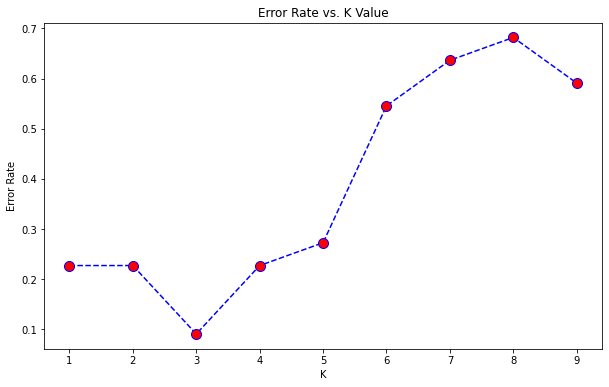

In [41]:
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('Error_vs_K_value.png')
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {round(knn.score(X_test, y_test), 4)*100}%")

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.93      0.96      0.94        22
weighted avg       0.95      0.91      0.91        22

Accuracy: 90.91%


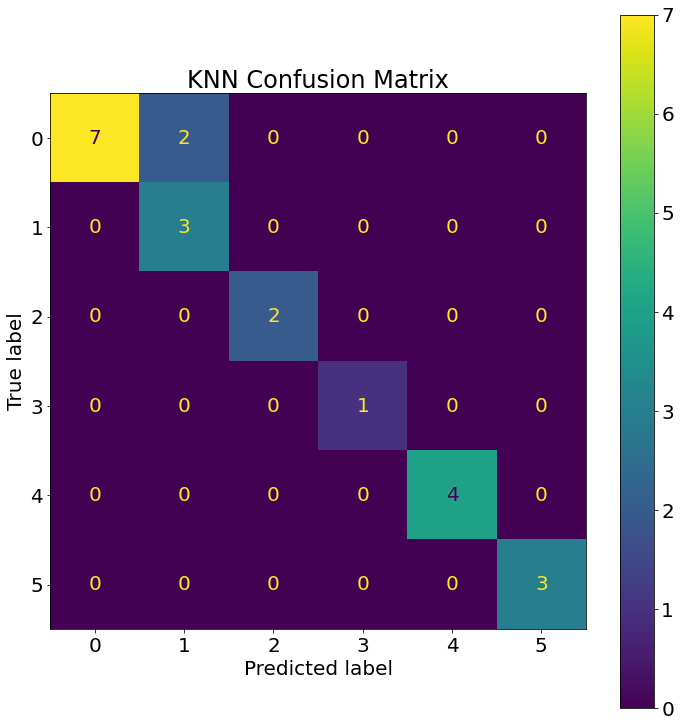

In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
disp.figure_.set_size_inches(10.5, 10.5)
disp.figure_.tight_layout()
# disp.ax_.set(annot_kws={"fontsize":8})
# disp.ax_.set(font_scale=2)
# print(disp.text_.fontsize(12))
# print(disp.im_)
plt.rcParams.update({'font.size': 20})
# print(disp.ax_.text(fontsize=12))
disp.ax_.set_title('KNN Confusion Matrix')
# plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('KNN_Conf_matrix.png')
plt.show()